# Graphical Models for Dummies
###            --- feat. Edward & PyMC3

<img src="sup_figs/Logo_ED.png" width="200" height="200" />
<img src="sup_figs/Logo_PM.png" width="300" height="200" />

    Author: Junhua Chen 
    Datetime: 2017.5.17

> This notebook introduces graphical models for **beginners** (well, not exactly, but who cares, jk, lamo). Or to be exact, the notebook is an tutorial for **practicing/coding/get your hands dirty** that kind of stuff for graphical model. All the codes/example is written in **python 2.7** feat. **Edward 1.2.4 [link](http://edwardlib.org/) and PyMC3 3.0 [link](https://github.com/pymc-devs/pymc3)**. The notebook will cover basic bayesian graphical model stuff and some basic inferece w.r.t **a simple linear model**. Some advance inference stuff will also (hopefully) be covered.

## Contents:
    Chapter I: Basic Intro, graphical model. 
    Chapter II: In practice, Edward vs PyMC3. 
    Chapter III: Advance Shows, feat. LDA,GAN,BNN. 
    Chapter IV: Disscussions and conclusions.

In [1]:
from IPython.display import Image

--- 

# Chatper I
### --- Baisc intro, in the case of Bayesian Linear Model

## 1.1 Graphical representation

How to read (joint probability vs graphical model)

Figure from mlss09 lecture by D Blei, Princeton University


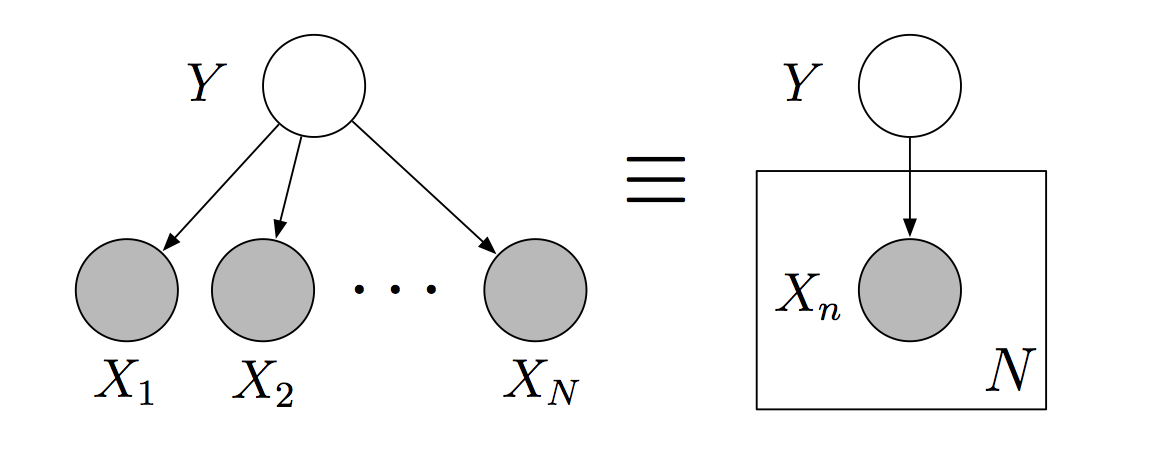

In [2]:
print('Figure from mlss09 lecture by D Blei, Princeton University')
Image(filename='sup_figs/GM_intro.png',retina=True)

$p(Y, X_1, X_2, ...)=p(X_1 \mid Y)p(X_2 \mid Y)...p(Y)=\prod {  p(X_n \mid Y)}p(Y)$

- Nodes are random variables
- Edges denote possible dependence
- Observed variables are shaded
- Plates denote replicated structure

## 1.2 Examples:

#### Case 0: Bayesian Linear Model (BLM)

Copy from google.images


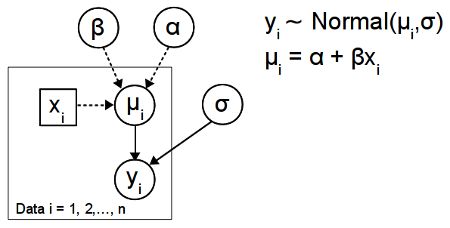

In [3]:
print('Copy from google.images')
Image(filename='sup_figs/GM_LM.png',width=300,height=300)


$$p(\mathbf{y},\mathbf{w},b,\mathbf{X})=p(\mathbf{y} \mid \mathbf{w},b,\mathbf{X})p(\mathbf{w})p(b)$$

\begin{align*}
  p(\mathbf{w})
  &=
  \text{Normal}(\mathbf{w} \mid \mathbf{0}, \sigma_w^2\mathbf{I}),
  \\[1.5ex]
  p(b)
  &=
  \text{Normal}(b \mid 0, \sigma_b^2),
  \\
  p(\mathbf{y} \mid \mathbf{w}, b, \mathbf{X})
  &=
  \prod_{n=1}^N
  \text{Normal}(y_n \mid \mathbf{x}_n^\top\mathbf{w} + b, \sigma_y^2).
\end{align*}

#### Case 1: Latent Dirichlet Allocation (LDA)

Figure from mlss09 lecture by D Blei, Princeton University


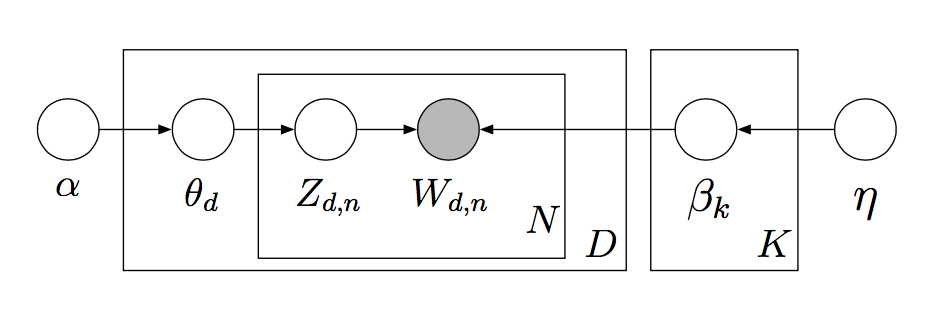

In [4]:
print('Figure from mlss09 lecture by D Blei, Princeton University')
Image(filename='sup_figs/GM_LDA.png',retina=True)

$$p(W_{ d,n },Z_{ d,n },{\theta} ,\beta ,\eta ,\alpha )=\prod _{  }^{ K }{ p({ \beta  }_{ k }|\eta ) } \prod _{  }^{ D }{ p({ \theta  }_{ d }|\alpha )\prod _{  }^{ N }{ p({ z }_{ d,n }|{ \theta  }_{ d })p({ w }_{ d,n }|{ \beta  }_{ { z }_{ d,n } }) }  } $$

\begin{align*}
 p(\beta) &= \text{Dir}\left( \eta  \right),    \beta \in { { \mathbb{R} } }^{ K\times V } ,\\
 p(\theta) &= \text{Dir} \left( \alpha  \right),    \theta \in { { \mathbb{R} } }^{ D\times K } ,\\
 p({ z }_{ d,n }) &= \text{Mult}\left( { \theta  }_{ d } \right) ,\\
 p({ w }_{ d,n }) &= \text{Mult}\left( { \beta  }_{ z_{d,n} } \right). \\ 
\end{align*}

>For each topic,
>> Draw a distribution over words ${ \beta  }_{ k }\sim { Dir }\left( \eta  \right) $.

>For each document,
>> Draw a vector of topic proportions ${ \theta  }_{ d }\sim Dir\left( \alpha  \right) $.

>> For each word, 
>>> Draw a topic assignment ${ Z }_{ d,n }\sim Mult\left( { \theta  }_{ d } \right) $, ${ Z }_{ d,n }\in \left\{ 1,...,K \right\} $.

>>> Draw a word ${ W }_{ d,n }\sim Mult\left( { \beta  }_{ { z }_{ d,n } } \right) $, ${ W }_{ d,n }\in \left\{ 1,...,V \right\} $.

! However, in programming, categorical distribution is chosen over multinomial almost all the time. Why cat over mult? 

#### *Categorical vs Multinomial distribution*

Some good topics of Cat vs Mult [#CvsM](https://www.quora.com/What-is-the-difference-between-the-categorical-distribution-and-the-multinomial-distribution)

> The multinomial distribution is when there are **multiple identical independent trials** where each trial has k possible outcomes.

> The categorical distribution is when there is **only one** such trial.

> In simple word, it's **single** vs **multiple** trails.

> Tips:
>> In general, Avoid using the term "categorical" to refer to a distribution or a probability model - save it for referring to variables. It's not really used consistently. Use the term "multinomial" for the distribution and probability model, as it's more widely understood without ambiguity.
The other case is continuous random variables: where the variable doesn't take values in neat "categories" but rather has a continuous, smooth probability distribution. However, in these cases, there are many, many other distribution models to choose from.

#### Case 2: Generative Adversarial Networks (GAN)

Figure from D Tran, Deep and Hierarchical Implicit Models, 2017.


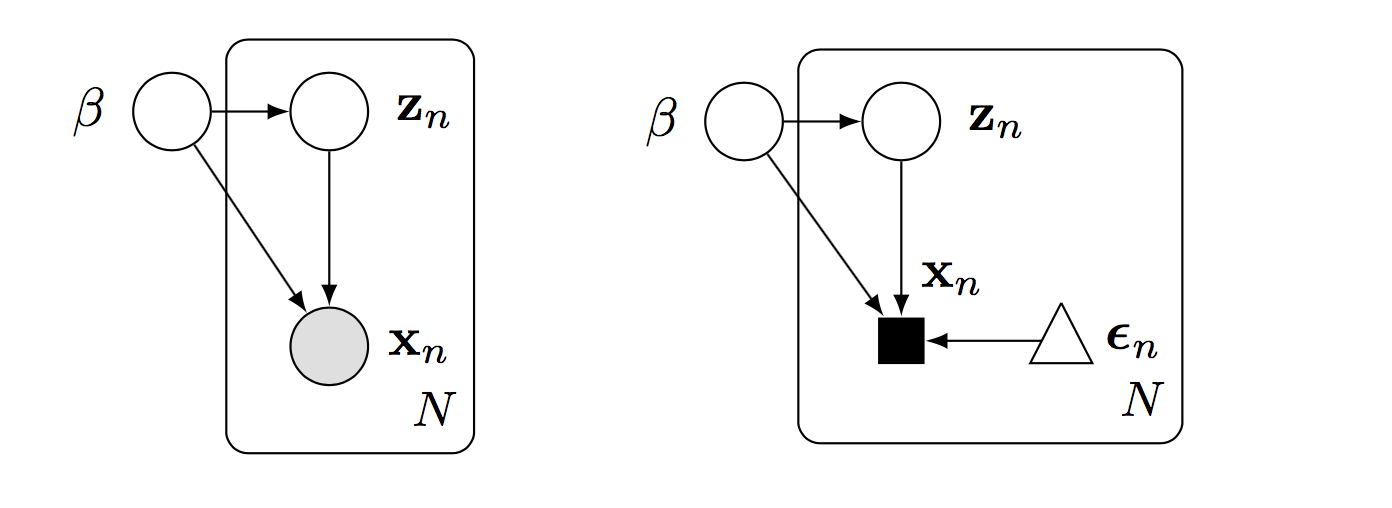

In [5]:
print('Figure from D Tran, Deep and Hierarchical Implicit Models, 2017.')
Image(filename='sup_figs/GM_HIM.png',retina=True)

*I have change the x to y (y is output, x is input)*

\begin{align*}
\text{Left: } p(y,z,\beta ) &= p(\beta )\prod^{ N }{ p({ x }_{ n }|{ z }_{ n },\beta )p({ z }_{ n }|\beta ) } \\
\text{Right: } p(y,z,\beta ) &= p(\beta )\prod^{ N }{ g({ \varepsilon  }_{ n }|{ z }_{ n },\beta )p({ z }_{ n }|\beta )p({ \varepsilon  }_{ n }) } \text{, where } { y }_{ n }=g({ \varepsilon  }_{ n }|{ z }_{ n },\beta )
\end{align*}  


Let the $g({ \varepsilon  }_{ n }|{ z }_{ n },\beta )$ be a two-layer full-connected neural network, i.e., let $\beta={W_1,b_1,W_2,b_2}$ and $z_n$ denotes all the latent value in the network.

\begin{align*}
{ W }_{ 1 } &\sim \text{Normal}(0,I),\quad { { \mathbb{R} } }^{ D\times K },\\ 
{ W }_{ 2 } &\sim \text{Normal}(0,I),\quad { { \mathbb{R} } }^{ K\times 1 },\\ 
{ b }_{ 1 } &\sim \text{Normal}(0,I),\quad { { \mathbb{R} } }^{ K },\\ 
{ b }_{ 2 } &\sim \text{Normal}(0,I),\quad { { \mathbb{R} } }^{ 1 },\\ 
\varepsilon &\sim \text{Normal}(0,I),\quad { { \mathbb{R} } }^{ N }, \\ 
y &= \text{NeuralNetwork}({ \varepsilon  }_{ n }|{ z }_{ n },\beta )\\ 
  &=sign({ z }_{ 2 }),\\ 
where\quad { z }_{ 2 } &= { z }_{ 1 }{ W }_{ 2 }+{ b }_{ 1 },\\ { z }_{ 1 } &= [X,\varepsilon ]{ W }_{ 1 }+{ b }_{ 1 }
\end{align*}

#### Case 3: Deep Generative Network (DGN) 

Figure from D Tran, Deep and Hierarchical Implicit Models, 2017.


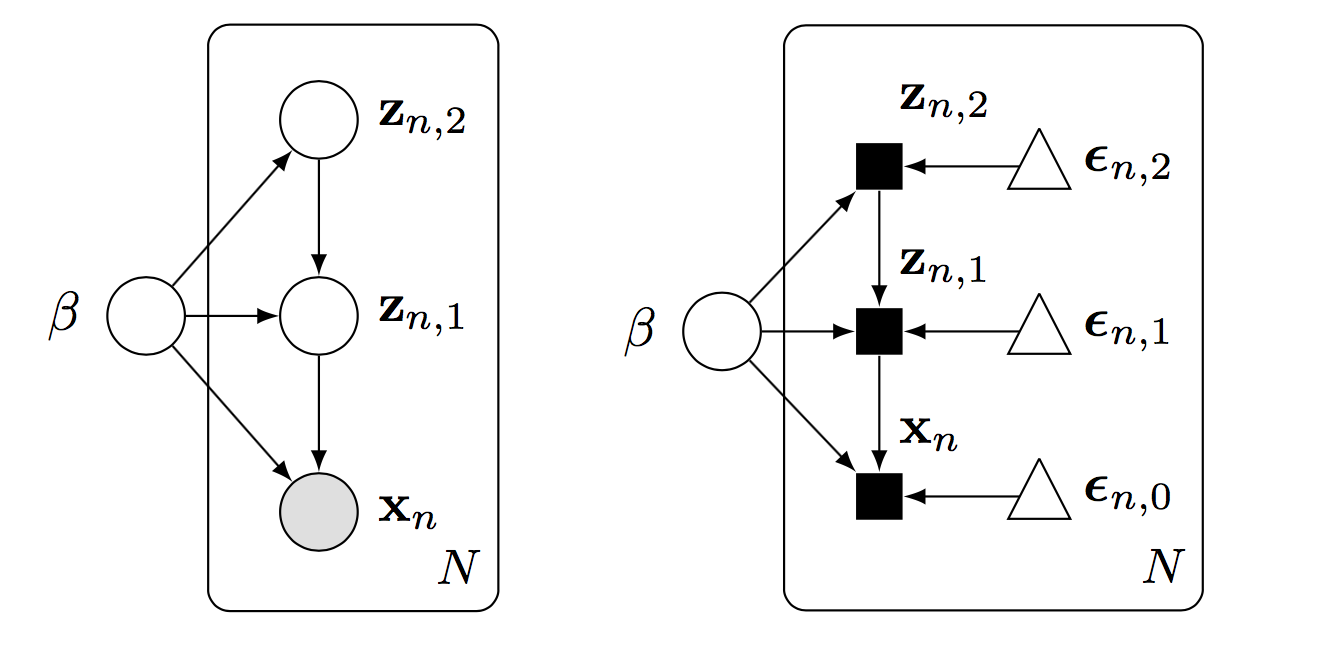

In [6]:
print('Figure from D Tran, Deep and Hierarchical Implicit Models, 2017.')
Image(filename='sup_figs/GM_DGN.png',retina=True)

*Almost identical to the last example! I'll leave it to you. LOL.*

## 1.3 Variational Inference

### 1.3.1 "OAA"  

the ***One Above All (OAA)*** equation in variational inference. [to be exact, in KL based variational inference, since I do not know if there is any thing else to do the VI, i.e., to the best of my knowledge].

\begin{align*}
\text{log}{ p }_{ \theta  }(x)&=\text{KL}({ q }_{ \phi  }(z|x)||{ p }_{ \theta  }(z|x))+\mathcal{L}(\theta ,\phi ;x), \\\\
where \\
\text{KL}({ q }_{ \phi  }(z|x)||{ p }_{ \theta  }(z|x))&=-\int { { q }_{ \phi  }(z|x)\text{log}\cfrac { { p }_{ \theta  }(z|x) }{ { q }_{ \phi  }(z|x) }  } dz, \\
\mathcal{L}(\theta ,\phi ;x)&=\int { { q }_{ \phi  }(z|x)\text{log}\cfrac { { p }_{ \theta  }(z,x) }{ { q }_{ \phi  }(z|x) }  } dz.
\end{align*}

### 1.3.2 KL divergence / ELBO

Figure from Pattern recognition and machine learning [book], chapter 9.


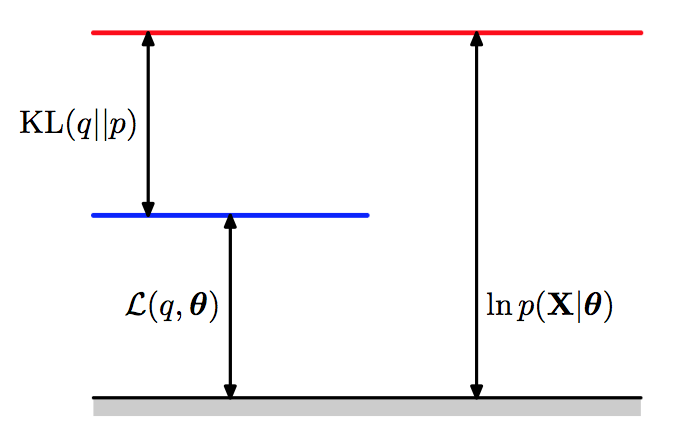

In [7]:
print('Figure from Pattern recognition and machine learning [book], chapter 9.')
Image(filename='sup_figs/VI_borrowEM.png',retina=True)

*Minimize the $KL(q||p)$ or maximize the $L(q,\theta)$ is guaranteed to maximize the log probability $p(X)$.*

*Use maximizing ELBO by default, it is easier most of the time.*

### 1.3.3 About KL meta

Figure from Pattern recognition and machine learning [book], chapter 10.
(a): KL(q||p); (b): KL(p||q)


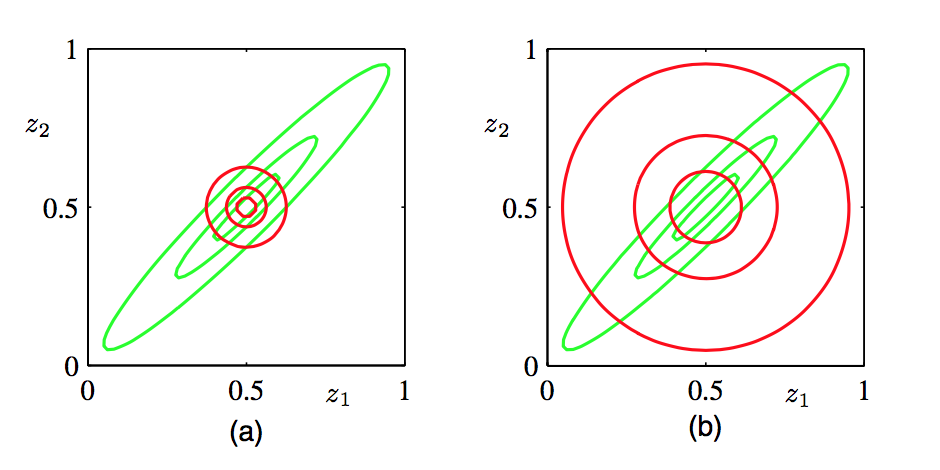

In [8]:
print('Figure from Pattern recognition and machine learning [book], chapter 10.')
print('(a): KL(q||p); (b): KL(p||q)')
Image(filename='sup_figs/VI_KL1.png',retina=True)

Figure from Pattern recognition and machine learning [book], chapter 10.
(a): KL(p||q); (b): KL(q||p); (c): KL(q||p).


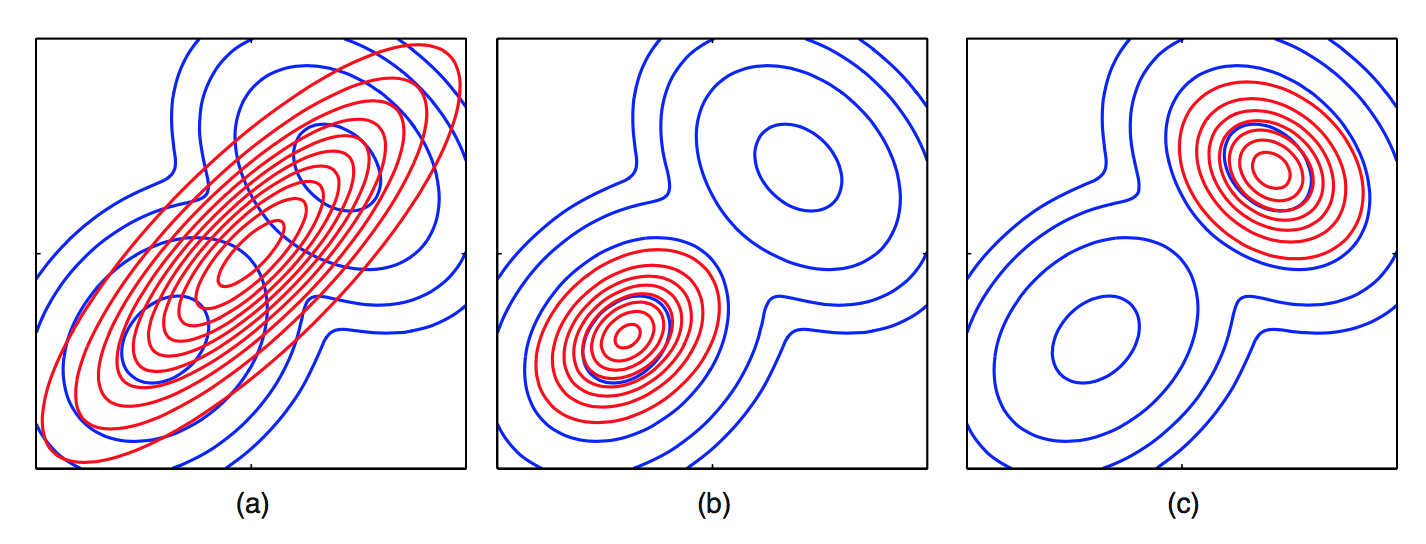

In [9]:
print('Figure from Pattern recognition and machine learning [book], chapter 10.')
print('(a): KL(p||q); (b): KL(q||p); (c): KL(q||p).')
Image(filename='sup_figs/VI_KL2.png',retina=True)

From the figures above [and the KL equation], we know:
- $\text{KL}$ is not symmetry (of course),
- $\text{KL}(q||p)$: region follows - q avoids where p is small,
- $\text{KL}(p||q)$: region follows - q is are nonzero in regions where p is nonzero.

***How to avoid the situation where q can not match the real p? ***

In My Humble Opinion
- Analytical form is always welcome.
- If not, try to make the variantional family as close as possible to the hypothetic/real distribution family.
- Do not rely too much on 'Auto' variational methods.

***Extentions:
   Maximum Likelihood Estimate(MLE) [optional]***

From All of Statistics [book], chapter 9.

Let $X_1,...,X_n$ be IID with [real] PDF $f(x;\theta)$.

>**Definition.** The **likelihood function** is define by

$${ \mathcal{L} }_{ n }=\prod _{ i=1 }^{ n }{ f({ X }_{ i };\theta ) } $$

>The **log-likelihood function** is define by $\mathscr{l}_n(\theta) = \text{log}\mathcal{L}_{n}(\theta)$.

>**Maximum Likelihood Estimate(MLE)** is to $\text{argmax}_{\theta}{\mathscr{l}_n(\theta)}$.

How can MLE leads to the real PDF, i.e., the true parameter $\theta_*$?

One of the Properties of MLE:
> The MLE is **consistent**: $\hat{\theta_n} \rightarrow^{P} \theta_*$.

A simple prove of **consistent**,
> Maximizing $\mathscr{l}_n(\theta)$ is equivalent to maximizing
$${ M }_{ n }(\theta )=\cfrac { 1 }{ n } \sum _{ i }^{  }{ \text{log}\cfrac { f({ X }_{ i };\theta ) }{ f({ X }_{ i };{ \theta  }_{ * }) }  } .$$

By the law of large numbers, ${ M }_{ n }(\theta )$ converges to
$${ \mathbb{E} }_{ { \theta  }_{ * } }\left( \text{log}\cfrac { f({ X }_{ i };\theta ) }{ f({ X }_{ i };{ \theta  }_{ * }) }  \right) =\int { \text{log}\left( \cfrac { f({ X }_{ i };\theta ) }{ f({ X }_{ i };{ \theta  }_{ * }) }  \right)  } f({ X }_{ i };{ \theta  }_{ * })dx=-KL({ \theta  }_{ * },\theta ).$$

And the $KL \ge 0$, the maximum happens where $KL = 0$.

***Wait, is that means MLE equivalent to minizing $KL(p||q)$? ***(I will leave that to the reader)

### 1.3.4 Ratio estimation (feat. GAN)

*Road to implicit density modeling.*

Suppose we want the variational distribution $q(x)$ to be close to the real distribution $p(x)$.

***How to measure the distance of two distribution $p(x)$ and $q(x)$?***

Ratio,
$$r(x)=\frac { p(x) }{ q(x) } .$$

- Let $y=1$ denotes sampling from $x_p$ and let $p(y=1)=\pi$,
- Let $y=0$ denotes sampling from $x_q$,
- Let $p(x)=p(x|y=1)$ and $q(x)=p(x|y=0)$, 
$$\frac{p(x)}{q(x)}=\frac{p(x|y=1)}{p(x|y=0)}=\frac{p(y=1|x)}{p(y=0|x)}\frac{1-\pi}{\pi}.$$

Define 
$$\mathcal{D}(x;\phi)=p(y=1|x),$$
$$x=\mathcal{G}(z;\theta) s.t. z~q(z).$$

Loss function:

\begin{align*}
\mathcal{L}(\phi ,\theta )&=\pi { \mathbb{E} }_{ p(x) }[-\text{log}\mathcal{D}(x;\phi )]+(1-\pi ){ \mathbb{E} }_{ q(z) }[-log(\mathcal{D}(\mathcal{G}(z;\theta );\phi ))].\\\\
where \\
\text{Ratio loss: }&\min _{ \phi  }{\pi { \mathbb{E} }_{ p(x) }[-\text{log}\mathcal{D}(x;\phi )]+(1-\pi ){ \mathbb{E} }_{ q(z) }[-log(\mathcal{D}(\mathcal{G}(z;\theta );\phi ))]},\\
\text{Generative loss: }&\min _{ \theta  }{{ \mathbb{E} }_{ q(z) }[log(\mathcal{D}(\mathcal{G}(z;\theta );\phi ))]}.
\end{align*}

Why talk about ratio estimate?
- Cuz it is GAN [the heart of GAN]. (trival)
- Cuz **edward** has the implemention. (trival)
- Cuz ratio estimate requires no **EXPLICIT** posterior. (nontrival)

*The ratio estimate is still very new to the author of this notebook [that is, me]. So, feel free to leave any comments if the notebook makes any mistakes.*

## 1.4 Discussion and Questions

---

# Chatper II
### --- Edward vs PyMC3, in the case of Bayesian Linear Model

In [41]:
import tensorflow as tf
import theano as tn
import edward as ed
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import six
from sklearn.metrics import mean_squared_error

In [42]:
%matplotlib inline
mpl.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [43]:
print 'Edward versions: ' + ed.__version__
print 'PyMC3 versions: ' + pm.__version__

Edward versions: 1.2.4
PyMC3 versions: 3.0


## 2.1 Datasets

    Number of samples in training set 400
    Number of samples in testing set 200
    Number of features: 10

In [47]:
def build_toy_dataset(N, w, noise_std=0.1):
    D = len(w)
    x = np.random.randn(N, D)
    y = np.dot(x, w) + np.random.normal(0, noise_std, size=N)
    return x, y

N = 400  # number of data points
D = 10  # number of features

w_true = np.random.randn(D)
X_train, y_train = build_toy_dataset(N, w_true)
X_test, y_test = build_toy_dataset(N, w_true)

## 2.2 Linear Model - Edward

#### Modeling

Notices: 
    1. Carefully choose placeholder for input data (for beginners).
    2. Keep the same form between true probability and variational family.
    3. Choose the inference carefully (use defualt--'KLqp' if not sure).
    4. Highly recommend using minibatch at any possible chance.

In [14]:
from edward.models import Normal

In [15]:
## Any differences among these three? :( 
## Prey tell were anyone know. (sad panda face)
a = Normal(tf.zeros(D), tf.ones(D))
b = Normal(tf.zeros(D), tf.ones(1))
c = Normal(tf.zeros(D), 1.0)

\begin{align*}
  p(\mathbf{w})
  &=
  \text{Normal}(\mathbf{w} \mid \mathbf{0}, \sigma_w^2\mathbf{I}),
  \\[1.5ex]
  p(b)
  &=
  \text{Normal}(b \mid 0, \sigma_b^2),
  \\
  p(\mathbf{y} \mid \mathbf{w}, b, \mathbf{X})
  &=
  \prod_{n=1}^N
  \text{Normal}(y_n \mid \mathbf{x}_n^\top\mathbf{w} + b, \sigma_y^2).
\end{align*}

In [48]:
X = tf.placeholder(tf.float32, [None,D])
w = Normal(tf.zeros(D), tf.ones(D))
b = Normal(tf.zeros(1), tf.ones(1))
y = Normal(ed.dot(X, w) + b, 1.0)
############

#variantional family
qw = Normal(tf.Variable(tf.random_normal([D])),
            tf.nn.softplus(tf.Variable(tf.random_normal([D])))) #softplus for >0
qb = Normal(tf.Variable(tf.random_normal([1])),
            tf.nn.softplus(tf.Variable(tf.random_normal([1]))))

In [49]:
print w
print b
print qw
print qb

RandomVariable("Normal_34/", shape=(10,), dtype=float32)
RandomVariable("Normal_35/", shape=(1,), dtype=float32)
RandomVariable("Normal_37/", shape=(10,), dtype=float32)
RandomVariable("Normal_38/", shape=(1,), dtype=float32)


#### Inference

Notice: 
    1. Tons of inference method avaliable.
    2. Understanding the function parameters is critical.

In [50]:
inference = ed.KLqp({w: qw, b: qb}, data={X: X_train, y: y_train})
inference.run(n_samples=5, n_iter=2000)

2000/2000 [100%] ██████████████████████████████ Elapsed: 12s | Loss: 404.808


#### Critism

Notice: 
    1. Point estimate (log-likelihood, Accuracy, Error, etc).
    2. Posterior predictive check (check if the model is reasonable).

In [51]:
y_post = ed.copy(y, {w: qw, b: qb})
# easy way, use inline evaluation
print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: X_test, y_post: y_test}, n_samples=500))
print("log likehood on train/test data:")
print(ed.evaluate('log_likelihood', data={X: X_train, y_post: tf.cast(y_train,tf.float32)}, n_samples=500))
print(ed.evaluate('log_likelihood', data={X: X_test, y_post: tf.cast(y_test,tf.float32)}, n_samples=500))

Mean squared error on test data:
0.0144251
log likehood on train/test data:
-0.939412
-0.939517


#### \*Some limiation of Edward (current 1.2.4 version)

> The evaluation in Edward does not return the **detailed samples reuslts** [from posterior]. Fortunately it is easy to compose your own function. ^^

In [52]:
# more control? get the samples
def evaluate_plus(data, n_samples=500, output_key=None):
    sess = ed.util.get_session()
    # checkings
    ed.util.check_data(data)
    if not isinstance(n_samples, int):
        raise TypeError("n_samples must have type int.")

    if output_key is None:
        # Default output_key to the only data key that isn't a placeholder.
        keys = [key for key in six.iterkeys(data) if not
                isinstance(key, tf.Tensor) or "Placeholder" not in key.op.type]
        if len(keys) == 1:
            output_key = keys[0]
        else:
            raise KeyError("User must specify output_key.")
    elif not isinstance(output_key, RandomVariable):
        raise TypeError("output_key must have type RandomVariable.")
    
    # data [feed dict] for tensorflow
    feed_dict = {key: value for key, value in six.iteritems(data)
                 if isinstance(key, tf.Tensor) and "Placeholder" in key.op.type}
    
    y_true = data[output_key]
    # Make predictions.
    tensor = tf.convert_to_tensor(output_key)
    y_pred = [sess.run(tensor, feed_dict) for _ in range(n_samples)]
    y_pred_mean = tf.add_n(y_pred) / tf.cast(n_samples, tf.float32)
    
    def mean_squared_error_(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_pred - y_true))

    print 'Mean_squared_error (by edward): \n%f'%sess.run(mean_squared_error_(y_true, y_pred_mean), feed_dict)
    return np.asarray(y_pred)

In [55]:
y_preds[:100]

array([[-0.47323966,  1.56982994,  0.3997463 , ..., -0.31466711,
        -0.33936295,  1.78734183],
       [-1.57172334,  3.95403028, -2.25757027, ..., -2.51992273,
        -0.18943113,  2.58581448],
       [-1.16506946,  3.19576263, -1.19946098, ..., -1.33079481,
        -1.62797046,  1.58680511],
       ..., 
       [-1.65594566,  0.14331305, -0.29096425, ..., -1.04820275,
         0.436268  ,  4.22754288],
       [ 0.35227537,  2.15054989, -1.79257715, ..., -2.58803153,
         0.40680727,  0.5553515 ],
       [-0.07381845,  2.43044281,  0.33625519, ..., -0.98652351,
        -0.0776308 ,  1.3742137 ]], dtype=float32)

In [53]:
y_preds = evaluate_plus(data={X: X_test, y_post: y_test})
print 'Mean_squared_error (by myself): \n%f'%mean_squared_error(y_test,y_preds.mean(axis=0))

Mean_squared_error (by edward): 
0.013489
Mean_squared_error (by myself): 
0.013489


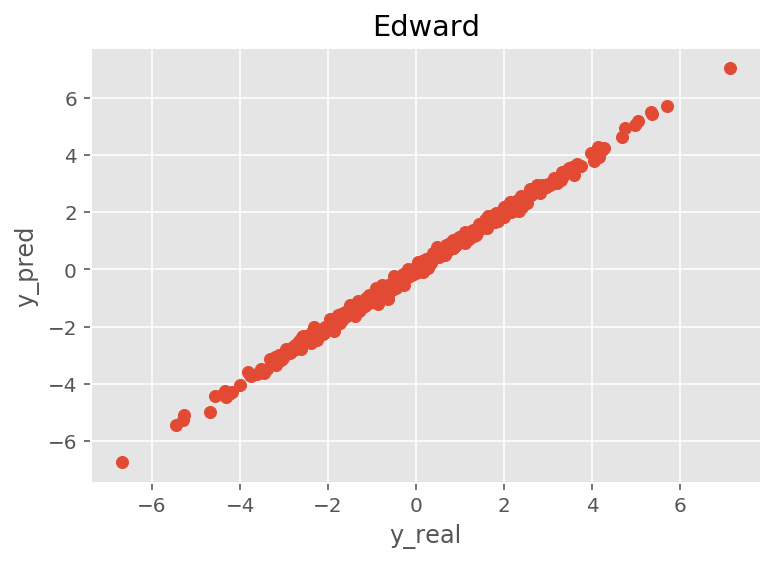

In [54]:
plt.scatter(y_test, y_preds.mean(axis=0));
plt.title('Edward');plt.xlabel('y_real'); plt.ylabel('y_pred');

### 2.3 Linear Model - PyMC3

#### Modeling

Notice: 
    1. Even simpler, just need to setup the computation graph.
    2. Recommend using continuous distributions, better for auto-inference.
    3. Use discrete distribution only in likelihood if possible.

In [56]:
X_ = tn.shared(X_train)
y_ = tn.shared(y_train)
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    b = pm.Normal('b', mu=0, sd=1.0)
    w = pm.Normal('w', mu=0, sd=1.0, shape=(D,))
    # Define likelihood
    y = pm.Normal('y', mu=b + tn.tensor.dot(X_, w),
                  sd=1.0, observed=y_)

#### Inference

Notice: 
    1. ADVI might sometimes not be as precise as some MC methods (NUTS) but much(*N) faster.
    2. ADVI is good(perhaps great) for determining start points for other sampling methods.
    3. Always compare 'sample_vp' and 'sample(NUTS)' after ADVI if possible.
        sample_vp: simply sampling from mean and var by ADVI;
        sample(NUTS): using results of ADVI as initial point to start a few rounds of 'hifi' sampling.

In [57]:
with model:
    v_params = pm.variational.advi(n=2000) 
    #trace = pm.variational.sample_vp(v_params, draws=400) 
    # sample_vp might be not accurate! (PyMC3 3.1 dont have this issue)
    trace = pm.sample(draws=400,start=v_params.means) 
    # [Surprise] use this instead, NUTS(MCMC) sampler over posterior.

Iteration 0 [0%]: ELBO = -3800.32
Iteration 200 [10%]: Average ELBO = -3234.0
Iteration 400 [20%]: Average ELBO = -3116.43
Iteration 600 [30%]: Average ELBO = -3027.29
Iteration 800 [40%]: Average ELBO = -2684.36
Iteration 1000 [50%]: Average ELBO = -2564.18
Iteration 1200 [60%]: Average ELBO = -2310.73
Iteration 1400 [70%]: Average ELBO = -2108.73
Iteration 1600 [80%]: Average ELBO = -2016.7
Iteration 1800 [90%]: Average ELBO = -1867.12
Finished [100%]: Average ELBO = -1737.28
Assigned NUTS to b
Assigned NUTS to w
 [-----------------100%-----------------] 400 of 400 complete in 0.2 sec

In [25]:
v_params.means

{'b': array(-0.0034937775176989696),
 'w': array([ 0.23284365,  0.02915038, -0.21293651, -0.41514688,  0.45283886,
        -0.16042726, -0.03735312, -0.58104328, -0.36287259,  0.35077556])}

In [26]:
## using default, i.e., NUTS.
#with model:
#    trace = pm.sample(2000)

#### Critism

Notice: 
    1. The PPC in PyMC3(current version 3.0) is not a proper PPC. [#In My Opinion].
    2. Treat the PPC in PyMC3(v3.0) as 'sampling from posterior', the end.

In [27]:
X_.set_value(X_test)
y_.set_value(y_test)
ppc = pm.sample_ppc(trace, model=model, samples=500)

In [28]:
print 'Mean_squared_error (by PyMC3): \n%f'%mean_squared_error(y_test,ppc['y'].mean(axis=0))

Mean_squared_error (by PyMC3): 
0.013910


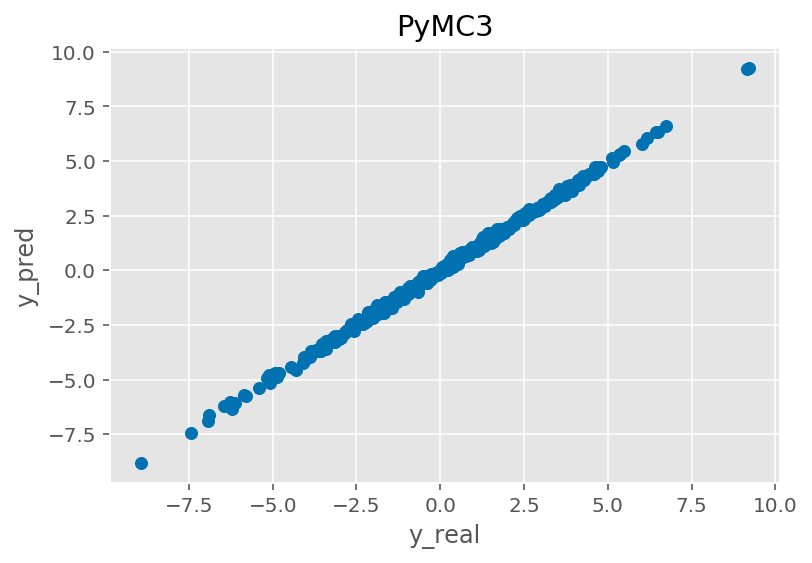

In [29]:
plt.scatter(y_test,ppc['y'].mean(axis=0),c='#0072B2');
plt.title('PyMC3'); plt.xlabel('y_real'); plt.ylabel('y_pred');

### 2.4 Discussion and Questions

--- 

# Chapter III
### --- advance topics

In [58]:
from edward.models import Normal
from edward.models import Dirichlet
from edward.models import Categorical
from keras.layers import Dense

>Notice:

>>    For now the chapter only covered basic modeling of some advance topics (because the author of this notebook is not yet fully understand how edward works, RIP), more [including inference and critisms and analysis] will be added in time.

## 3.1 LDA feat. Edward

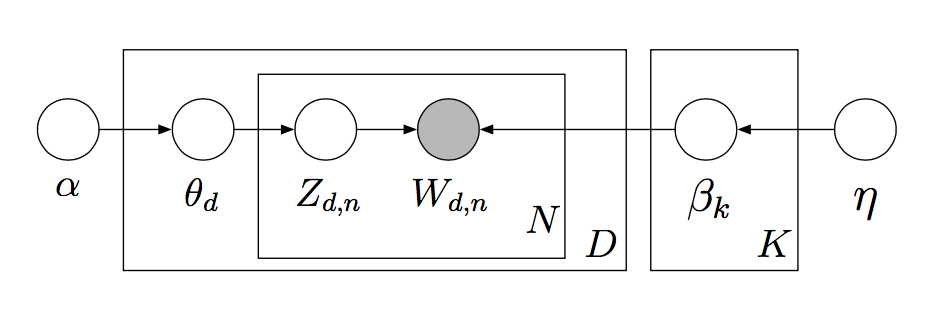

In [31]:
Image(filename='sup_figs/GM_LDA.png',retina=True)

LDA [edward] code ref [#463](https://github.com/blei-lab/edward/issues/463 "#463")

In [32]:
D = 3 # number of documents
N = [15,23,25] # words per doc
K = 4 # number of topics
V = 100 # vocabulary size

theta = Dirichlet(tf.zeros([D,K]) + 0.1)
beta = Dirichlet(tf.zeros([K,V]) + 0.05)
z = [[0] * np.max(N)] * D
w = [[0] * np.max(N)] * D
for d in range(D):
    for n in range(N[d]):
        z[d][n] = Categorical(logits=ed.logit(tf.gather(theta, d)))
        w[d][n] = Categorical(logits=ed.logit(tf.gather(beta, z[d][n])))

Sadly, LDA is not yet solved in with edward. 

## 3.2 GAN feat. Edward

*Though I sad GAN, it is more a general implicit density model.*

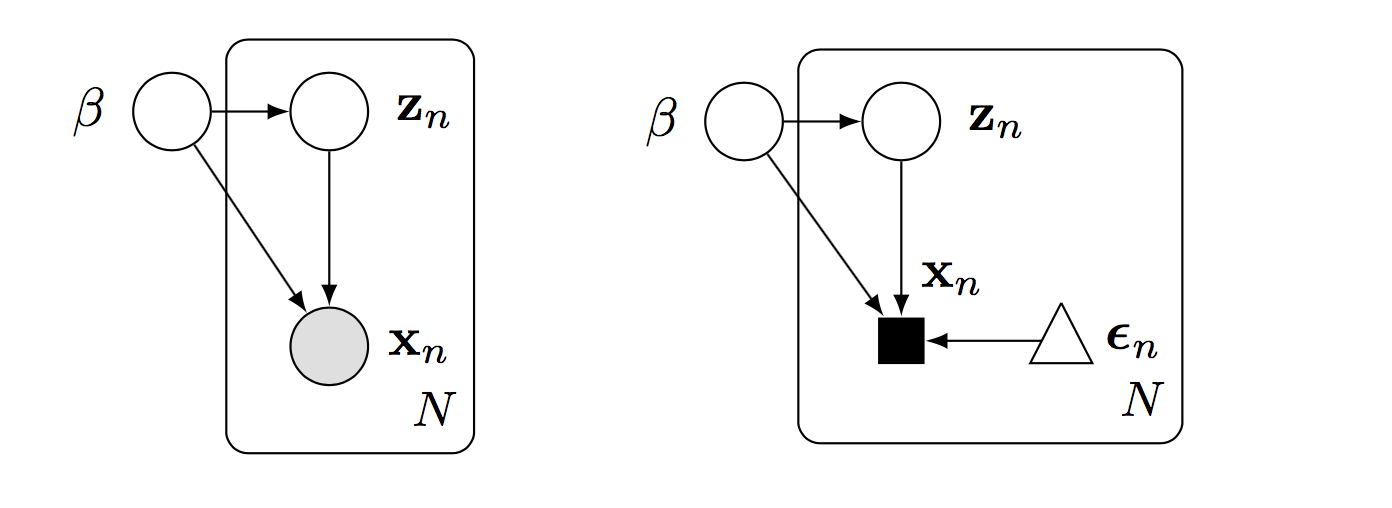

In [33]:
Image(filename='sup_figs/GM_HIM.png',retina=True)

HIM [edward] code ref [#DHIM](https://arxiv.org/pdf/1702.08896.pdf "#DHIM") and [#BNN](https://github.com/blei-lab/edward/blob/master/examples/bayesian_nn.py)

In [59]:
def build_toy_dataset(N=40, D=10, noise_std=0.1):
    X = np.random.random((N,D))
    y = np.cos(X.sum(axis=1)) + np.random.normal(0, noise_std, size=N)
    X = X.reshape((N, D))
    return X, y

D = 10 # number of features
N = 40 # number of samples
X_train, y_train = build_toy_dataset(N, D) # dataset

In [35]:
## Naive approach of inference
# weights and bias (aka, beta)
W_1 = Normal(tf.zeros([D+1, 10]), tf.ones([D+1, 10]))
W_2 = Normal(tf.zeros([10, 1]), tf.ones([10, 1]))
b_1 = Normal(tf.zeros(10), tf.ones(10))
b_2 = Normal(tf.zeros(1), tf.ones(1))

# input and neural network and ouput
X = tf.placeholder(tf.float32, [N, D])
eps = Normal(tf.zeros([N, 1]), tf.ones([N, 1]))

# y = neural_network(X)
def neural_network(X):
    input = tf.concat([X, eps], 1)
    h_1 = tf.nn.relu(tf.matmul(input, W_1) + b_1)
    h_2 = tf.sign(tf.matmul(h_1, W_2) + b_2)
    return tf.reshape(h_2, [-1])

y = neural_network(X)

In [36]:
# variational distribution
qW_1 = Normal(tf.Variable(tf.random_normal([D+1, 10])),
              tf.nn.softplus(tf.Variable(tf.random_normal([D+1, 10]))))
qW_2 = Normal(tf.Variable(tf.random_normal([10, 1])),
              tf.nn.softplus(tf.Variable(tf.random_normal([10, 1]))))
qb_1 = Normal(tf.Variable(tf.random_normal([10])),
              tf.nn.softplus(tf.Variable(tf.random_normal([10]))))
qb_2 = Normal(tf.Variable(tf.random_normal([1])),
              tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qeps = Normal(tf.Variable(tf.random_normal([N, 1])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, 1]))))

# inference wih KLqp
inference = ed.KLqp({W_1: qW_1, b_1: qb_1,
                     W_2: qW_2, b_2: qb_2,
                     eps: qeps}, data={X: X_train, y: y_train})
inference.run()

1000/1000 [100%] ██████████████████████████████ Elapsed: 5s | Loss: 0.000


## 3.3 DGN feat. Edward

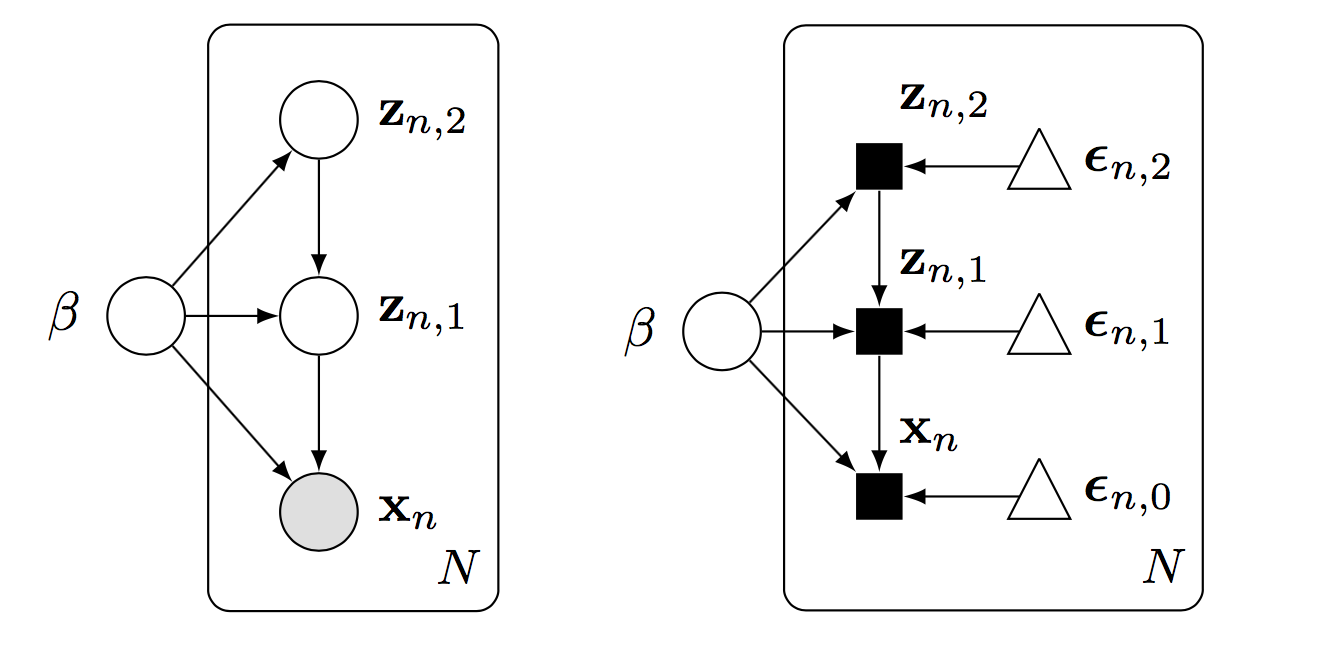

In [37]:
Image(filename='sup_figs/GM_DGN.png',retina=True)

DGN [edward] code ref [#DHIM](https://arxiv.org/pdf/1702.08896.pdf "#DHIM") and [#VAE](https://github.com/blei-lab/edward/blob/master/examples/vae.py)

In [38]:
N = 100 # number of samples
D = 9 # number of features
# each datapoint is x_n \in \mathbb{R}^{D}
X_train, _ = build_toy_dataset(N, D) # dataset

# random noise
eps2 = Normal(tf.zeros([N, D]), tf.ones([N, D]))
eps1 = Normal(tf.zeros([N, D]), tf.ones([N, D]))
eps0 = Normal(tf.zeros([N, D]), tf.ones([N, D]))

# network (Notice, I modify the net. Point it out if there is any mistakes.)
def generative_network():
    z2 = Dense(32, activation='relu')(eps2)
    z1 = Dense(32, activation='relu')(tf.concat([z2, eps1], 1))
    return Dense(D, activation=None)(tf.concat([z1, eps0], 1))

X = generative_network()

In [39]:
# variational distribution
qeps2 = Normal(tf.Variable(tf.random_normal([N, D])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, D]))))
qeps1 = Normal(tf.Variable(tf.random_normal([N, D])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, D]))))
qeps0 = Normal(tf.Variable(tf.random_normal([N, D])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, D]))))

# inference wih KLqp
inference = ed.KLqp({eps2: qeps2,
                     eps1: qeps1,
                     eps0: qeps0,}, data={X: X_train})
inference.run()

1000/1000 [100%] ██████████████████████████████ Elapsed: 3s | Loss: 0.000


#### VAE approach? 

In [40]:
## Notice that this is only a trial version [no promises]
# random noise, suppose eps2 is z!
z = Normal(tf.zeros([N, D]), tf.ones([N, D]))
eps1 = Normal(tf.zeros([N, D]), tf.ones([N, D]))
eps0 = Normal(tf.zeros([N, D]), tf.ones([N, D]))

# network (Notice, I modify the net. Point it out if there is any mistakes.)
def generative_network(z):
    h = Dense(32, activation='relu')(z)
    h = Dense(32, activation='relu')(tf.concat([h, eps1], 1))
    x = Dense(D, activation=None)(tf.concat([h, eps0], 1))
    return x
 
def inference_network(x):
    h = Dense(32, activation='relu')(x)
    h = Dense(32, activation='relu')(h)
    z = Dense(D, activation=None)(h)
    return z

x = generative_network(z)


# inference, mixing
x_ph = tf.placeholder(tf.float32, [N, D])
qeps1 = Normal(tf.Variable(tf.random_normal([N, D])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, D]))))
qeps0 = Normal(tf.Variable(tf.random_normal([N, D])),
              tf.nn.softplus(tf.Variable(tf.random_normal([N, D]))))
qz = inference_network(x_ph)

### 3.4 Discussion and Questions

- What is the difference in writing native network vs. using integrated package (e.g. Dense[keras] or slim[tensorflow])?
- Can GAN or VAE do classification problem? It is appropriate？(Forgive my ignorance, RIP)


--- 

# Chapter IV
### --- discussion & questions

Words from author:
> 
- This notebook covers some basic intro of graphical model, mostly bayesian network.
- This notebook introduces **Edward** and **PyMC3** with simple linear model example.
- The object of this notebook is to encourage practicing with GM.
- More in Chapter III will be updated in time.

--- 

# Refernce

- Tran, Dustin, Rajesh Ranganath, and David M. Blei. "Deep and Hierarchical Implicit Models." arXiv preprint arXiv:1702.08896 (2017).
- Goodfellow, Ian, et al. "Generative adversarial nets." Advances in neural information processing systems. 2014.
- Tran, Dustin, et al. "Edward: A library for probabilistic modeling, inference, and criticism." arXiv preprint arXiv:1610.09787 (2016).
- Kucukelbir, Alp, et al. "Automatic differentiation variational inference." arXiv preprint arXiv:1603.00788 (2016).
- Salvatier, John, Thomas V. Wiecki, and Christopher Fonnesbeck. "Probabilistic programming in Python using PyMC3." PeerJ Computer Science 2 (2016).
- Blei, David M., Andrew Y. Ng, and Michael I. Jordan. "Latent dirichlet allocation." Journal of machine Learning research 3.Jan (2003).
- Anzai, Yuichiro. Pattern recognition and machine learning. Elsevier, 2012.
- Wasserman, Larry. All of statistics: a concise course in statistical inference. Springer Science & Business Media, 2013.